<a href="https://colab.research.google.com/github/CM-007/DS_ASS/blob/main/Ass13_KNN(glass).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings('ignore')

# **Import Dataset**

In [ ]:
dataframe = pd.read_csv('/content/glass.csv')

# **EDA**

In [ ]:
dataframe

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
dataframe.shape

(214, 10)

In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
dataframe.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
dataframe.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


# **X and Y Values**

In [ ]:
X = dataframe.drop('Type',axis=1)
Y = dataframe[['Type']]

# **Standardize**

In [ ]:
Standard = StandardScaler()
X = Standard.fit_transform(X)

In [ ]:
Y.value_counts()

Type
2       76
1       70
7       29
3       17
5       13
6        9
dtype: int64

In [ ]:
X

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

# **KFold Cross Validation**

In [ ]:
num_folds = 10
kfold = KFold(n_splits=10)

# **KNN Model**

In [ ]:
model = KNeighborsClassifier(n_neighbors=7)#k=17

In [ ]:
results = cross_val_score(model, X, Y, cv=kfold)

In [ ]:
results

array([0.59090909, 0.86363636, 0.59090909, 0.81818182, 0.42857143,
       0.28571429, 0.33333333, 0.        , 0.19047619, 0.04761905])

In [ ]:
results.mean()

0.4149350649350649

# **Grid Search for Algorithm Tuning**

In [ ]:
n_neighbors = np.array([2*i+1 for i in range(0,20)]) #only odd number of clusters (1 3 5 7 ... 39) will be considered
param_grid = dict(n_neighbors=n_neighbors) # used to create a python dictionary called param_grid

In [ ]:
param_grid

{'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
        35, 37, 39])}

In [ ]:
n_neighbors

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.6498338870431895
{'n_neighbors': 3}


# **Visualizing the Cross Validation results**

In [ ]:
# search for an optimal value of K for KNN
# range of k we want to try
k_range = range(1, 41)
# empty list to store scores
k_scores = []

#we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

# k_scores=grid.best_score_
pd.Series(k_scores).sort_values(ascending=False)

1     0.695671
2     0.691126
4     0.663203
3     0.658442
0     0.658225
5     0.653463
7     0.635065
9     0.630519
6     0.625758
11    0.621212
8     0.620996
13    0.616450
10    0.616234
12    0.602381
15    0.597835
19    0.593723
18    0.593290
14    0.592857
33    0.588528
34    0.588528
37    0.588312
20    0.584416
23    0.584416
26    0.583983
39    0.583983
16    0.583766
36    0.583766
24    0.579654
28    0.579437
38    0.579004
25    0.575108
27    0.574892
17    0.574459
21    0.570346
30    0.570130
35    0.569913
22    0.565584
29    0.565152
32    0.560823
31    0.555844
dtype: float64

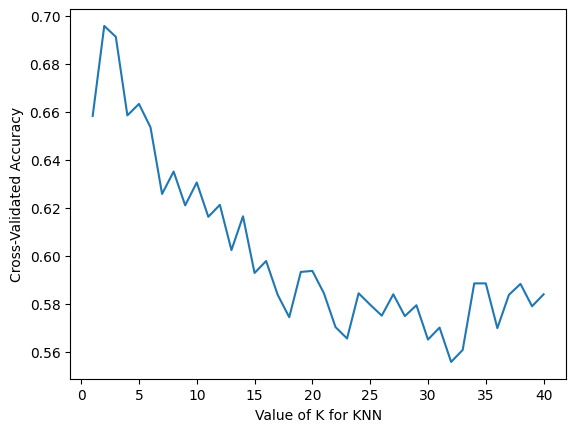

In [ ]:
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=10)
    k_scores.append(scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)


plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

# **E N D**